# EDA & Data Preprocessing on Google App Store Rating Dataset.

## 1. Import required libraries and read the dataset.


In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [373]:
df= pd.read_csv("Apps_data+(1).csv")

## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


In [374]:
df.sample(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9495,ek tuhi,VIDEO_PLAYERS,4.7,316,2.8M,"10,000+",Free,0,Everyone,Video Players & Editors,"July 4, 2014",1.0,4.0 and up
4767,Casino X - Free Online Slots,GAME,4.5,30515,Varies with device,"1,000,000+",Free,0,Teen,Casino,"May 22, 2018",2.92,4.0 and up


In [375]:
df.shape

(10841, 13)

In [376]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [378]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [379]:
df.describe(include='O')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [380]:
'''Rating, Category, Reviews,Type, Price, Content Rating are the columns that need to be worked upon for model building.'''

'Rating, Category, Reviews,Type, Price, Content Rating are the columns that need to be worked upon for model building.'

## 4. Check if there are any duplicate records in the dataset? if any drop them.


In [381]:
df.duplicated().sum()

483

In [382]:
duplicate= df[df.duplicated()]
duplicate

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [383]:
df.drop_duplicates(inplace=True)

In [384]:
df.shape

(10358, 13)

## 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.


In [385]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [386]:
invalid= df[df['Category']=='1.9']
invalid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [387]:
df.drop(index=10472, inplace=True)

In [388]:
df.shape

(10357, 13)

In [389]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

##  Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)


In [390]:
df['Rating'].isnull().sum()

1465

In [391]:
missing_ratings=df[df['Rating'].isnull()].index

In [392]:
missing_ratings

Index([   23,   113,   123,   126,   129,   130,   134,   163,   180,   185,
       ...
       10816, 10818, 10821, 10822, 10823, 10824, 10825, 10831, 10835, 10838],
      dtype='int64', length=1465)

In [393]:
df.drop(index =missing_ratings, inplace=True)

In [394]:
df.shape

(8892, 13)

In [395]:
df['Ratings_Category']=df['Rating'].map(lambda x: 'Low' if x<=3.5 else 'High')

In [396]:
df.sample(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Ratings_Category
4114,Super Car F. Mod for MCPE,GAME,3.6,214,4.9M,"50,000+",Free,0,Everyone,Adventure,"July 19, 2018",3.0.1,4.2 and up,High


## 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.


Text(0, 0.5, 'Count')

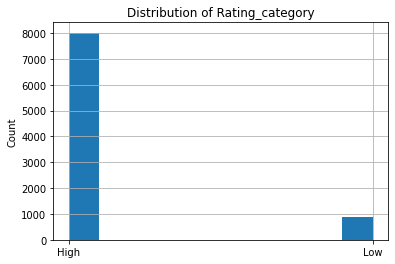

In [397]:
df["Ratings_Category"].hist()
plt.title("Distribution of Rating_category")
plt.ylabel('Count')

In [398]:
"""Most of the Rairngs are high(more than 3.5)"""

'Most of the Rairngs are high(more than 3.5)'

## 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [399]:
df["Reviews"]

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8892, dtype: object

In [400]:
df["Reviews"]=df["Reviews"].astype("int",)

<AxesSubplot:ylabel='Reviews'>

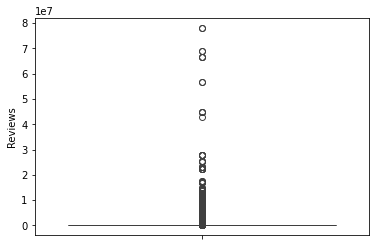

In [401]:
sns.boxplot(df["Reviews"])

In [402]:
from sklearn.preprocessing import FunctionTransformer
log_transform= FunctionTransformer(np.log1p)
log_transform.fit(df)

FunctionTransformer(func=<ufunc 'log1p'>)

In [403]:
df['Reviews']=log_transform.transform(df['Reviews'])
df['Reviews']

0         5.075174
1         6.875232
2        11.379520
3        12.281389
4         6.875232
           ...    
10834     2.079442
10836     3.663562
10837     1.609438
10839     4.744932
10840    12.894981
Name: Reviews, Length: 8892, dtype: float64

In [404]:
df['Reviews'].describe()

count    8892.000000
mean        8.259044
std         3.839224
min         0.693147
25%         5.105945
50%         8.458610
75%        11.174199
max        18.174247
Name: Reviews, dtype: float64

<AxesSubplot:ylabel='Reviews'>

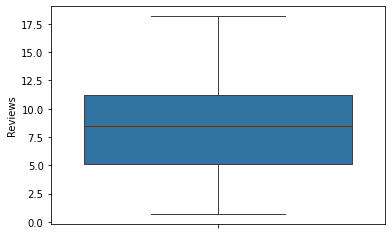

In [405]:
sns.boxplot(df["Reviews"])

## 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [406]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8892, dtype: object

In [407]:
Varies_with_device = df[df["Size"] == "Varies with device"].index
Varies_with_device

Index([   37,    42,    52,    67,    68,    73,    85,    88,    89,    92,
       ...
       10647, 10679, 10681, 10707, 10712, 10713, 10725, 10765, 10826, 10839],
      dtype='int64', length=1468)

In [408]:
df.drop(index=Varies_with_device,inplace=True)

In [409]:
df.shape

(7424, 14)

In [410]:
df['Size']=df['Size'].replace({'k':'*1000','M':'*1000000'}, regex=True).map(eval)

In [411]:
df.reset_index()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Ratings_Category
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7419,10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,3.806662,619000.0,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,High
7420,10834,FR Calculator,FAMILY,4.0,2.079442,2600000.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High
7421,10836,Sya9a Maroc - FR,FAMILY,4.5,3.663562,53000000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High
7422,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1.609438,3600000.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,High


In [412]:
df['Size']=df['Size'].astype(float)

## 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.


In [413]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [414]:
df['Installs']=df['Installs'].str.replace(",","").str.replace("+","")

In [415]:
df['Installs']=df['Installs'].astype(int)

## 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.


In [416]:
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [417]:
df['Price']=df['Price'].str.replace("$","")

In [418]:
df['Price'].unique()

array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

In [419]:
df['Price']=df['Price'].astype(float)

## 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)


In [420]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Ratings_Category'],
      dtype='object')

In [421]:
df.drop(["App","Rating","Genres","Last Updated","Current Ver","Android Ver"], axis = 1,inplace=True)

In [422]:
df

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Ratings_Category
0,ART_AND_DESIGN,5.075174,19000000.0,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,6.875232,14000000.0,500000,Free,0.0,Everyone,High
2,ART_AND_DESIGN,11.379520,8700000.0,5000000,Free,0.0,Everyone,High
3,ART_AND_DESIGN,12.281389,25000000.0,50000000,Free,0.0,Teen,High
4,ART_AND_DESIGN,6.875232,2800000.0,100000,Free,0.0,Everyone,High
...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,3.806662,619000.0,1000,Free,0.0,Everyone,High
10834,FAMILY,2.079442,2600000.0,500,Free,0.0,Everyone,High
10836,FAMILY,3.663562,53000000.0,5000,Free,0.0,Everyone,High
10837,FAMILY,1.609438,3600000.0,100,Free,0.0,Everyone,High


## 13. Encode the categorical columns.


In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7424 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          7424 non-null   object 
 1   Reviews           7424 non-null   float64
 2   Size              7424 non-null   float64
 3   Installs          7424 non-null   int32  
 4   Type              7424 non-null   object 
 5   Price             7424 non-null   float64
 6   Content Rating    7424 non-null   object 
 7   Ratings_Category  7424 non-null   object 
dtypes: float64(3), int32(1), object(4)
memory usage: 493.0+ KB


In [424]:
cat_col=df.select_dtypes(include='O').columns

In [425]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
oe.fit(df[cat_col])
df=pd.DataFrame(oe.transform(df[cat_col]),columns=cat_col)
df

,Category,Type,Content Rating,Ratings_Category
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,4.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
7419,3.0,0.0,1.0,0.0
7420,11.0,0.0,1.0,0.0
7421,11.0,0.0,1.0,0.0
7422,11.0,0.0,1.0,0.0


In [426]:
oe.categories_

[array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
        'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
        'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
        'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
        'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
        'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
        'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
        'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
        'VIDEO_PLAYERS', 'WEATHER'], dtype=object),
 array(['Free', 'Paid'], dtype=object),
 array(['Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+',
        'Teen', 'Unrated'], dtype=object),
 array(['High', 'Low'], dtype=object)]

 ## 14. Segregate the target and independent features (Hint: Use Rating_category as the target)


In [427]:
X = df.drop("Ratings_Category", axis=1)

y = df[["Ratings_Category"]]

In [428]:
X

,Category,Type,Content Rating
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,4.0
4,0.0,0.0,1.0
...,...,...,...
7419,3.0,0.0,1.0
7420,11.0,0.0,1.0
7421,11.0,0.0,1.0
7422,11.0,0.0,1.0


In [429]:
y

,Ratings_Category
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
7419,0.0
7420,0.0
7421,0.0
7422,0.0


## 15. Split the dataset into train and test

In [430]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [431]:
print("X_train")
X_train

X_train


,Category,Type,Content Rating
6047,0.0,0.0,1.0
791,15.0,0.0,1.0
4423,20.0,0.0,1.0
4881,30.0,1.0,1.0
3772,18.0,0.0,1.0
...,...,...,...
905,17.0,0.0,1.0
5192,11.0,0.0,2.0
3980,11.0,1.0,1.0
235,6.0,0.0,1.0


In [432]:
print("X_test")
X_test

X_test


,Category,Type,Content Rating
3789,29.0,0.0,1.0
4816,11.0,1.0,2.0
823,15.0,0.0,1.0
3807,29.0,0.0,1.0
3488,11.0,0.0,4.0
...,...,...,...
4248,29.0,0.0,1.0
993,18.0,0.0,1.0
6769,3.0,0.0,1.0
7138,11.0,0.0,4.0


In [433]:
print("y_train")
y_train

y_train


,Ratings_Category
6047,0.0
791,0.0
4423,0.0
4881,0.0
3772,0.0
...,...
905,0.0
5192,0.0
3980,1.0
235,0.0


In [434]:
print("y_test")
y_test

y_test


,Ratings_Category
3789,0.0
4816,0.0
823,0.0
3807,0.0
3488,0.0
...,...
4248,0.0
993,0.0
6769,0.0
7138,0.0


## 16. Standardize the data, so that the values are within a particular range.


In [435]:
from sklearn.preprocessing import StandardScaler

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7424 entries, 0 to 7423
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          7424 non-null   float64
 1   Type              7424 non-null   float64
 2   Content Rating    7424 non-null   float64
 3   Ratings_Category  7424 non-null   float64
dtypes: float64(4)
memory usage: 232.1 KB


In [437]:
ss = StandardScaler()
ss.fit(df)

StandardScaler()

In [438]:
df=pd.DataFrame(ss.transform(df),columns=ss.feature_names_in_)

In [439]:
df.describe()

,Category,Type,Content Rating,Ratings_Category
count,7.424000e+03,7.424000e+03,7.424000e+03,7.424000e+03
mean,3.828355e-18,-9.188053e-17,-1.301641e-16,1.531342e-17
std,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00
min,-2.037666e+00,-2.820292e-01,-1.456849e+00,-3.535802e-01
25%,-6.862167e-01,-2.820292e-01,-4.632205e-01,-3.535802e-01
50%,-3.176396e-01,-2.820292e-01,-4.632205e-01,-3.535802e-01
75%,9.109508e-01,-2.820292e-01,-4.632205e-01,-3.535802e-01
max,1.893823e+00,3.545732e+00,3.511294e+00,2.828213e+00


# Data Visualization on Honey Production dataset using seaborn and matplotlib libraries.


## 1. Import required libraries and read the dataset.


In [440]:
df2= pd.read_csv("honeyproduction.csv")

In [441]:
df2

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [442]:
df2.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [443]:
df2.shape

(626, 8)

In [444]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [445]:
df2.describe(include='all')

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
unique,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,NaN,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,NaN,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,NaN,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,NaN,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,NaN,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000


## 3. Display the percentage distribution of the data in each year using the pie chart.


In [446]:
year_percentage_dist = df2.groupby('year').size()/len(df2)*100

In [447]:
year_percentage_dist

year
1998    6.869010
1999    6.869010
2000    6.869010
2001    7.028754
2002    7.028754
2003    7.028754
2004    6.549521
2005    6.549521
2006    6.549521
2007    6.549521
2008    6.549521
2009    6.389776
2010    6.389776
2011    6.389776
2012    6.389776
dtype: float64

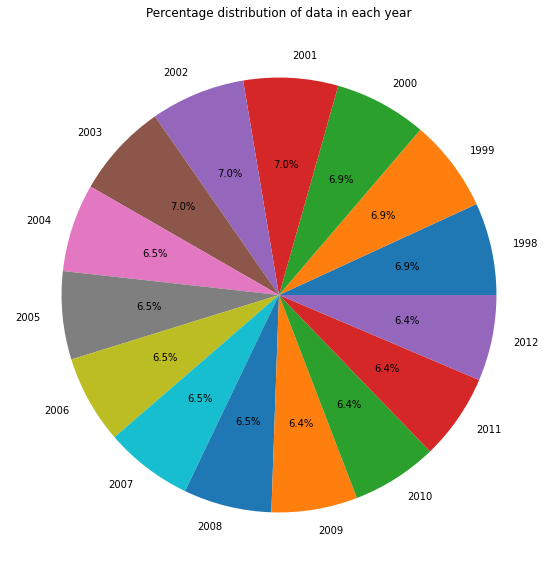

In [448]:
plt.figure(figsize=(10,10))
plt.pie(year_percentage_dist,labels=year_percentage_dist.index,autopct='%1.1f%%')
plt.title('Percentage distribution of data in each year')
plt.show()

## 4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.


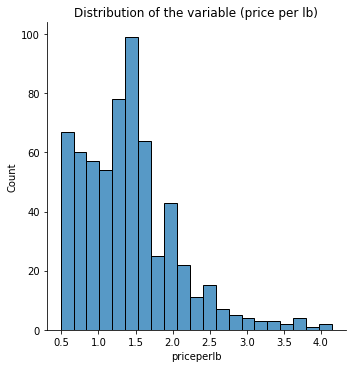

In [449]:
sns.displot(df2['priceperlb'])
plt.title("Distribution of the variable (price per lb)")
plt.show()

In [450]:
'''Almost 100 honey producers have average price per pound between $1.35 and $1.5. More than 50% of the honey is priced $0.5 to $1.65 average price per pound. It is a right skewed distribution.'''

'Almost 100 honey producers have average price per pound between $1.35 and $1.5. More than 50% of the honey is priced $0.5 to $1.65 average price per pound. It is a right skewed distribution.'

## 5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.


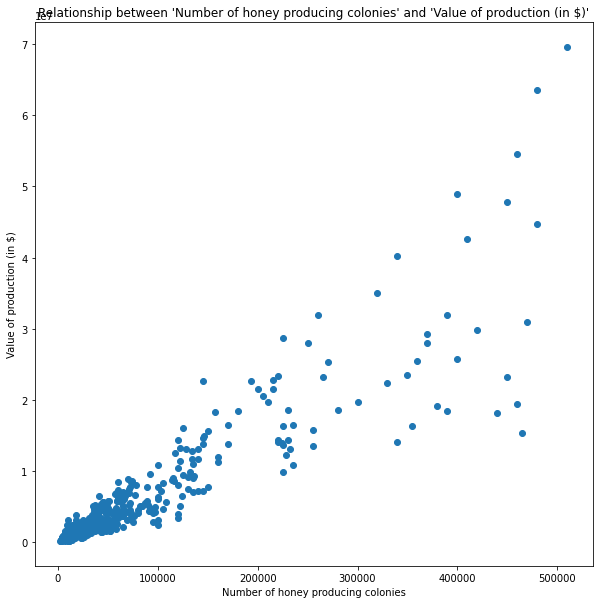

In [451]:
plt.figure(figsize=(10,10))
plt.scatter(x=df2['numcol'],y=df2['prodvalue'])
plt.title("Relationship between 'Number of honey producing colonies' and 'Value of production (in $)'")
plt.xlabel("Number of honey producing colonies")
plt.ylabel("Value of production (in $)")
plt.show()

In [452]:
'''Numcol and prodvalue have a positive relationship.'''

'Numcol and prodvalue have a positive relationship.'

## 6. Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.


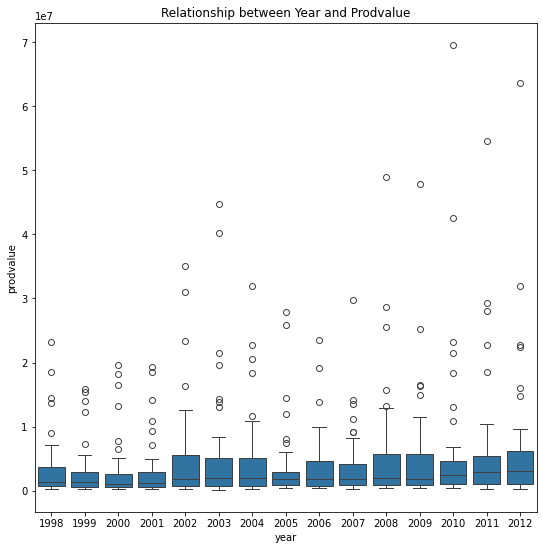

In [453]:
plt.figure(figsize=(9,9))
sns.boxplot(df2, x='year', y='prodvalue')
plt.title('Relationship between Year and Prodvalue')
plt.show()

In [454]:
'''In all the years prodvalue has outliers. '''

'In all the years prodvalue has outliers. '

## 7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')


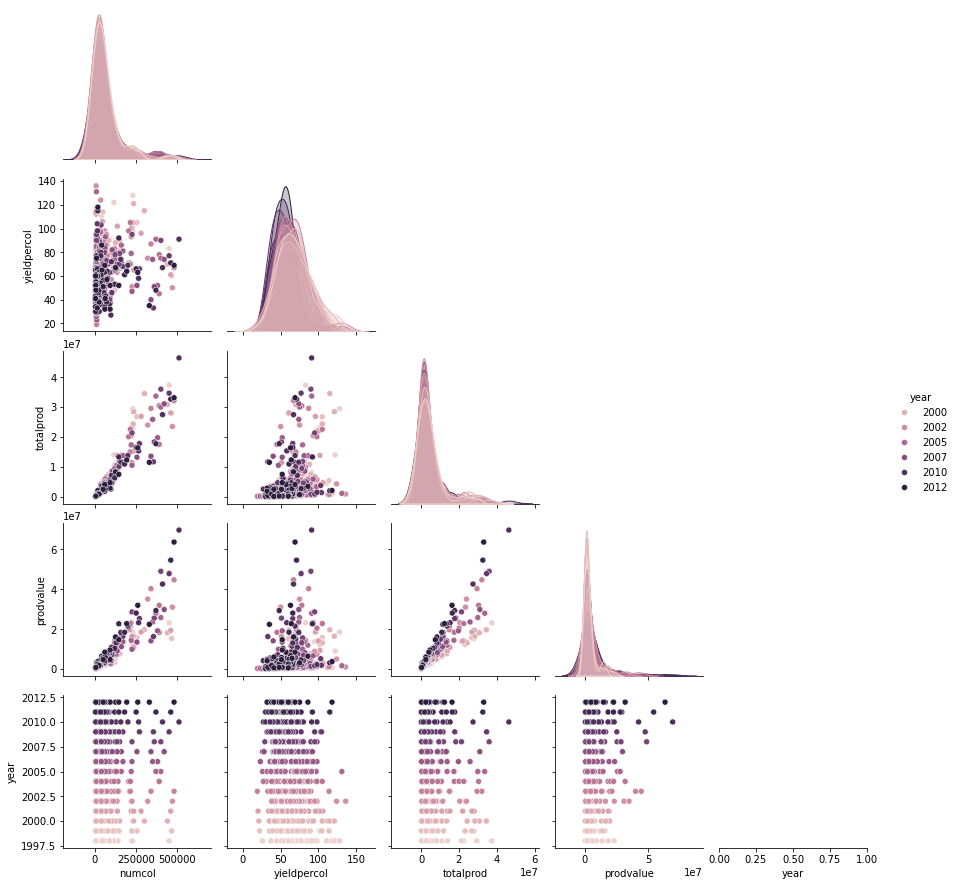

In [455]:
sns.pairplot(df2, vars=['numcol', 'yieldpercol', 'totalprod', 'prodvalue', 'year'], hue='year',corner=True)

In [456]:
'''total product vs numcol,prodvalue vs numcol and prodvalue vs totalprod has a positive relation. While others have no relation. numcol, yieldpercol, totalprod, prodvalue has increased over the year.'''

'total product vs numcol,prodvalue vs numcol and prodvalue vs totalprod has a positive relation. While others have no relation. numcol, yieldpercol, totalprod, prodvalue has increased over the year.'

## 8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue')


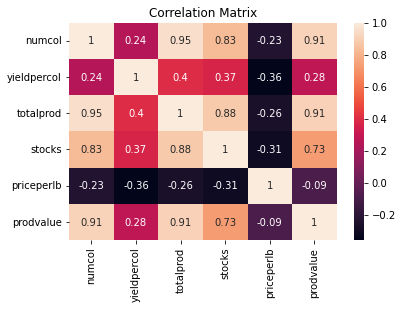

In [457]:
data_subset = df2[['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']]
corr_matrix = data_subset.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [458]:
'''
Postive correlation(Top 3)
totalprod and numcol
prodvalue and numcol
prodvalue and totalprod

Negative corellation(Top 3)
priceperlb and yieldpercol
priceperlb and stocks
priceperlb and totalprod
'''

'\nPostive correlation(Top 3)\ntotalprod and numcol\nprodvalue and numcol\nprodvalue and totalprod\n\nNegative corellation(Top 3)\npriceperlb and yieldpercol\npriceperlb and stocks\npriceperlb and totalprod\n'